# **Taiwanese Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

taiw_ds_path = '../../datasets/UCI/Taiwan/data.xls'
taiw_prep_ds_path = '../../datasets/preprocessed/taiw/'

(CVXPY) May 23 07:55:33 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 23 07:55:33 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(taiw_prep_ds_path)

In [3]:
data = utilities.read_excel(taiw_ds_path, header=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Rename features labels to have more meaningful names.

In [5]:
data.rename(columns={'default payment next month':'defaulted'}, inplace=True)

#### Fix column dtypes.

In [6]:
data['defaulted'] = data['defaulted'].astype(bool)

#### Plot features data types.

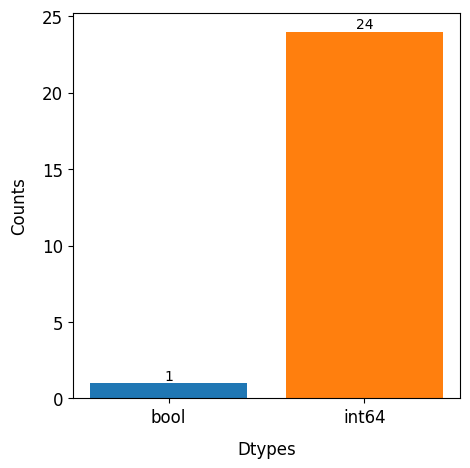

In [7]:
plotting.plot_dtypes_hist(data, save_path=taiw_prep_ds_path)

#### Data cleaning.

In [8]:
before_data_cleaning_count = len(data)

#### Plot class distribution.

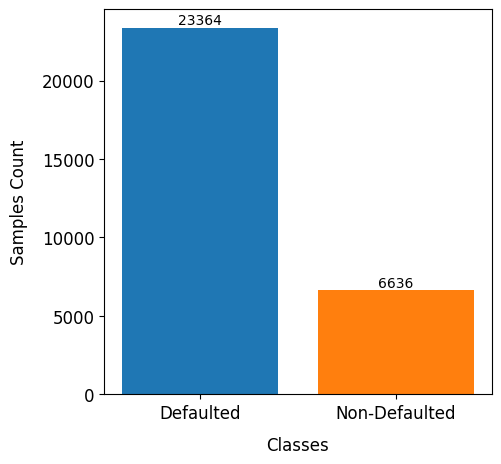

In [9]:
plotting.plot_class_distr_hist(data, save_path=taiw_prep_ds_path)

#### Plot missing values histogram.

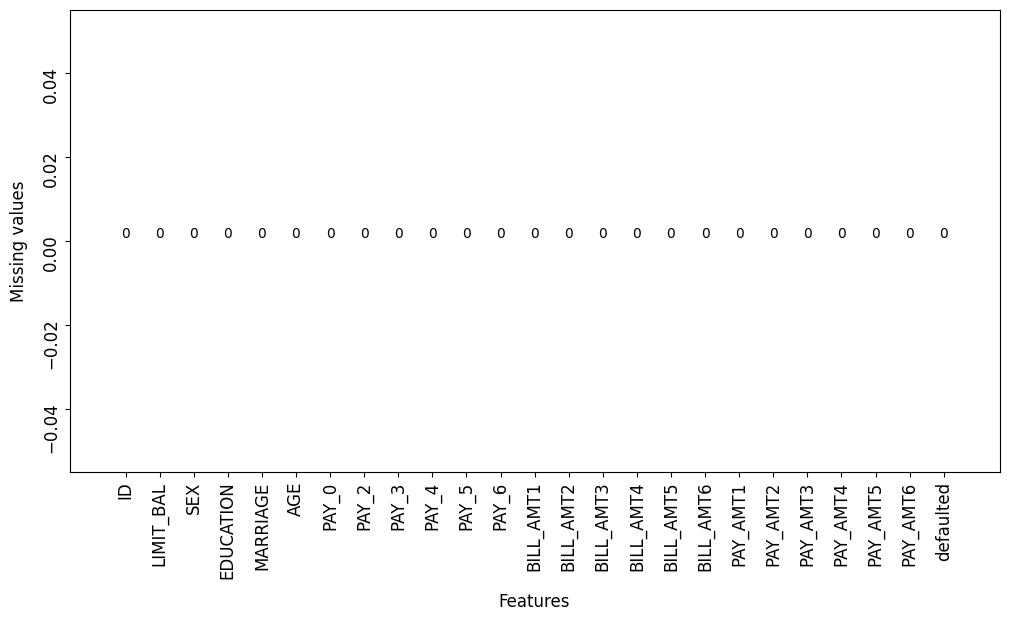

In [10]:
plotting.plot_missing_hist(data, figsize=(12,6), save_path=taiw_prep_ds_path)

#### Drop useless and ambiguous features and all features not known to investors ex ante.

In [11]:
data.drop(['ID', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1, inplace=True)

#### Apply optimal binninf and WoE.

In [12]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=taiw_prep_ds_path,
                                                     verbose=True)



Processing feature: LIMIT_BAL.
2023-05-23 19:55:35,419 | INFO : Optimal binning started.
2023-05-23 19:55:35,419 | INFO : Options: check parameters.
2023-05-23 19:55:35,420 | INFO : Pre-processing started.
2023-05-23 19:55:35,420 | INFO : Pre-processing: number of samples: 30000
2023-05-23 19:55:35,421 | INFO : Pre-processing: number of clean samples: 29833
2023-05-23 19:55:35,422 | INFO : Pre-processing: number of missing samples: 0
2023-05-23 19:55:35,422 | INFO : Pre-processing: number of special samples: 0
2023-05-23 19:55:35,422 | INFO : Pre-processing: number of outlier samples: 167
2023-05-23 19:55:35,422 | INFO : Pre-processing terminated. Time: 0.0010s
2023-05-23 19:55:35,423 | INFO : Pre-binning started.
2023-05-23 19:55:35,428 | INFO : Pre-binning: number of prebins: 13
2023-05-23 19:55:35,428 | INFO : Pre-binning: number of refinements: 0
2023-05-23 19:55:35,429 | INFO : Pre-binning terminated. Time: 0.0052s
2023-05-23 19:55:35,429 | INFO : Optimizer started.
2023-05-23 1

In [13]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,defaulted
0,-0.689378,0.079777,-0.078217,-0.073704,-0.216619,True
1,-0.117782,0.079777,-0.078217,0.064489,0.089862,True
2,-0.117782,0.079777,-0.078217,0.064489,0.119614,False
3,-0.259886,0.079777,-0.078217,-0.073704,0.025241,False
4,-0.259886,-0.115154,-0.078217,-0.073704,-0.179296,False
...,...,...,...,...,...,...
29995,0.345341,-0.115154,-0.155265,-0.073704,0.025241,False
29996,0.141410,-0.115154,-0.155265,0.064489,0.003821,False
29997,-0.674170,-0.115154,-0.078217,0.064489,0.025241,True
29998,-0.117782,-0.115154,-0.155265,-0.073704,0.003821,True


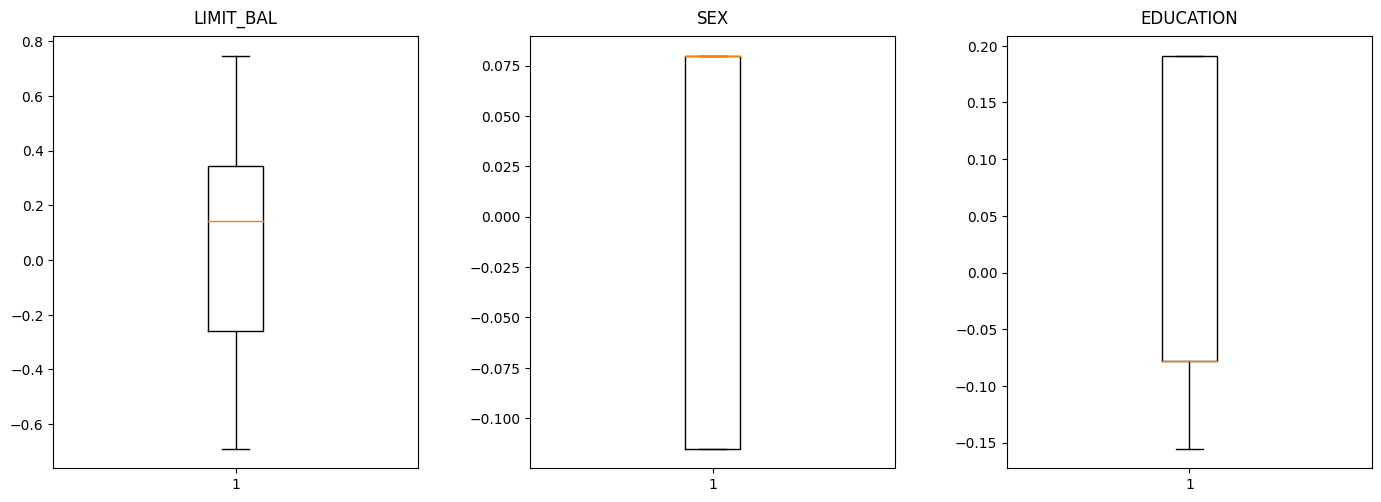

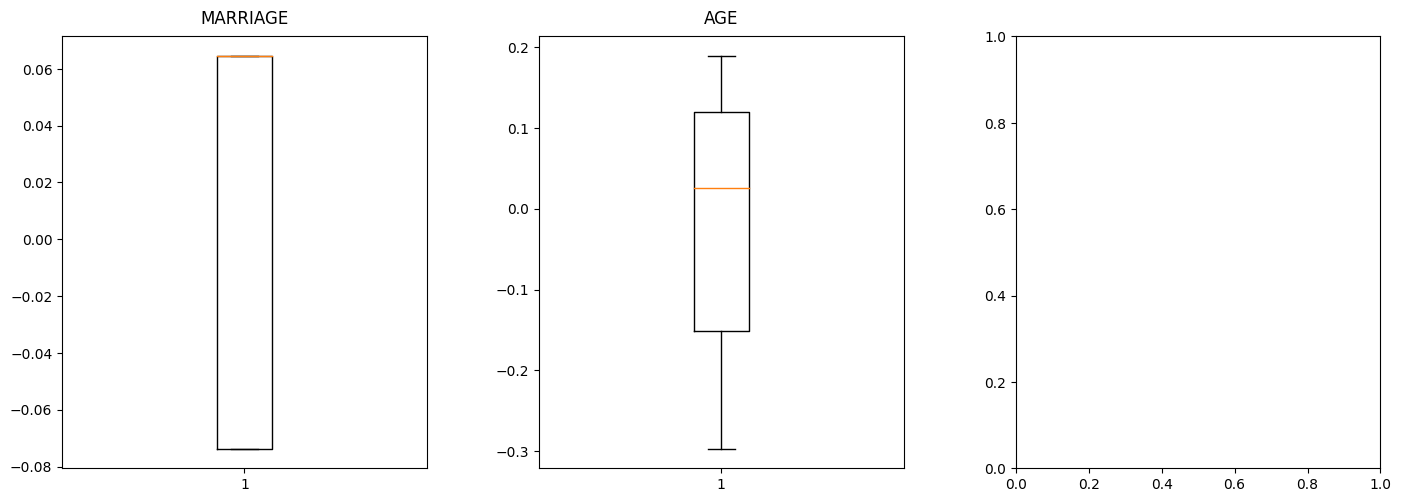

In [14]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=taiw_prep_ds_path)

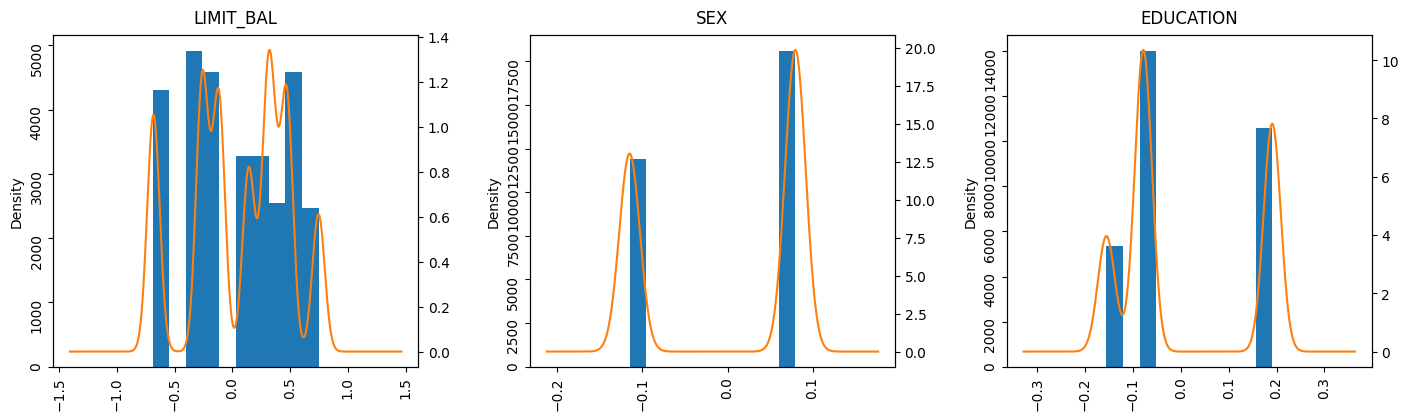

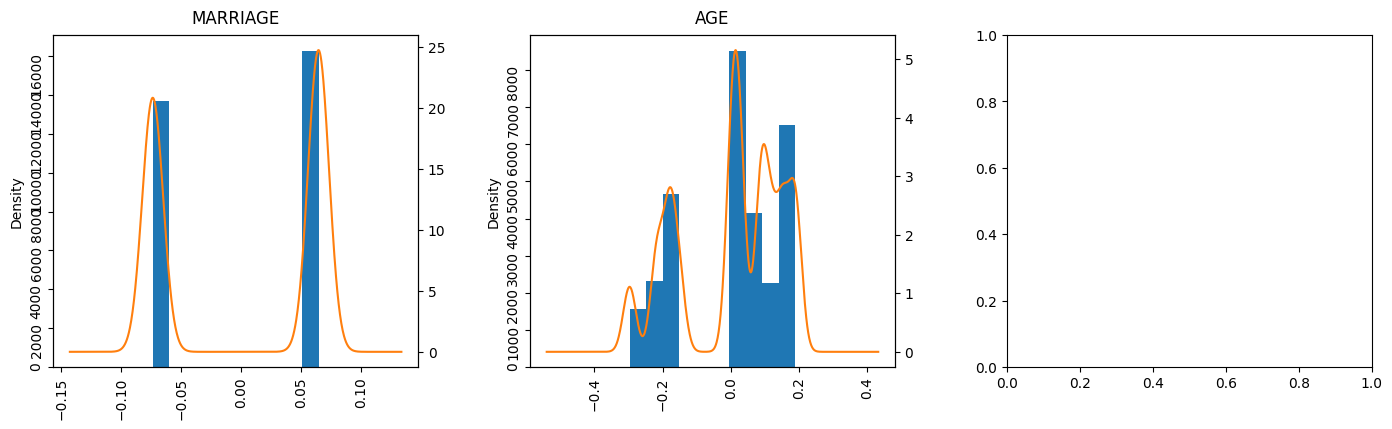

In [15]:
plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=taiw_prep_ds_path)

#### Plot samples count before and after Data cleaning.

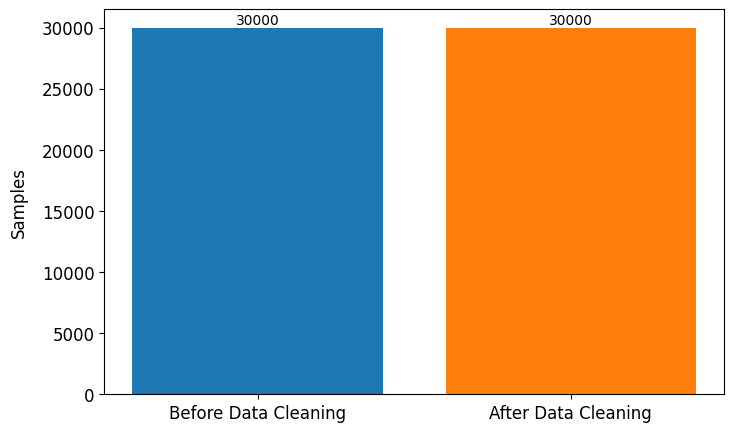

In [16]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=taiw_prep_ds_path + 'before_after.pdf')

#### Features IV scores

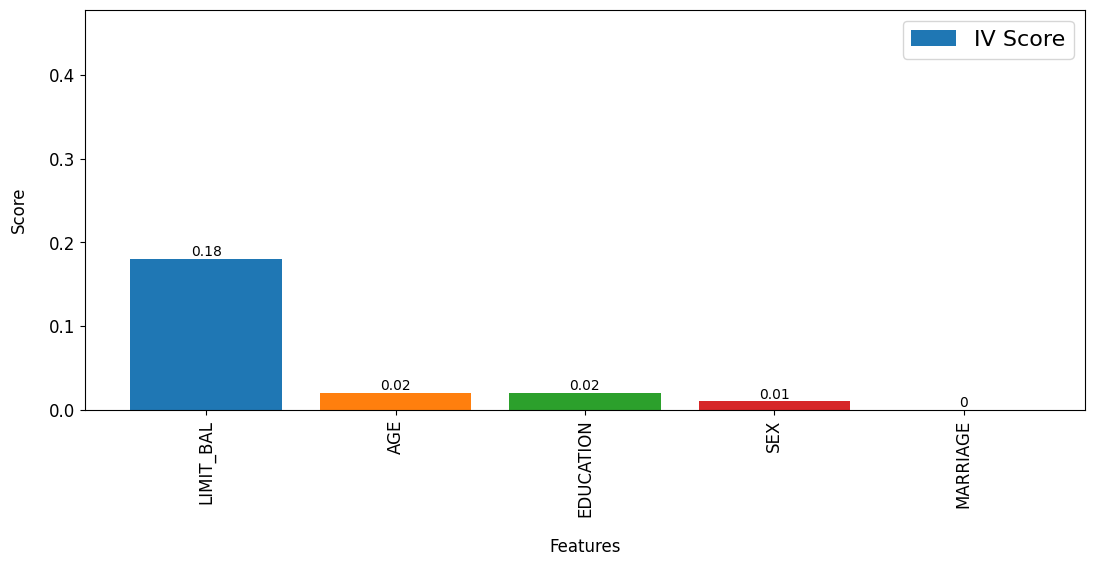

In [17]:
plotting.plot_features_scores(features_scores, '')

#### Features correlation

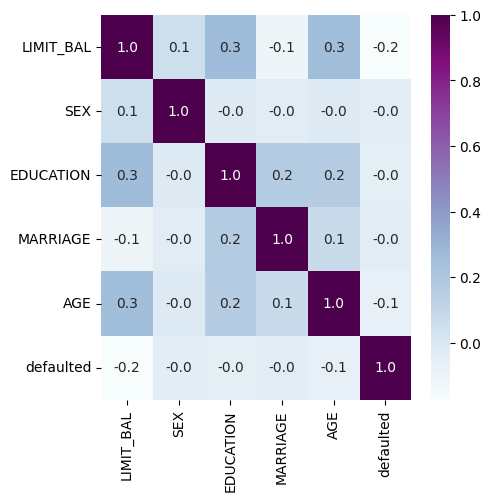

In [18]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(5, 5), save_path=taiw_prep_ds_path, dpi=100)

#### Save preprocessed dataset.

In [19]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,defaulted
0,-0.689378,0.079777,-0.078217,-0.073704,-0.216619,True
1,-0.117782,0.079777,-0.078217,0.064489,0.089862,True
2,-0.117782,0.079777,-0.078217,0.064489,0.119614,False
3,-0.259886,0.079777,-0.078217,-0.073704,0.025241,False
4,-0.259886,-0.115154,-0.078217,-0.073704,-0.179296,False
...,...,...,...,...,...,...
29995,0.345341,-0.115154,-0.155265,-0.073704,0.025241,False
29996,0.141410,-0.115154,-0.155265,0.064489,0.003821,False
29997,-0.674170,-0.115154,-0.078217,0.064489,0.025241,True
29998,-0.117782,-0.115154,-0.155265,-0.073704,0.003821,True


In [20]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   defaulted  30000 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 1.2 MB


**EMP-$p_1$:**

In [21]:
preprocessing.compute_p1(data)

0.2212

**EMP-$p_0$:**

In [22]:
preprocessing.compute_p0(data)

0.7788

In [23]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=taiw_prep_ds_path)

Train split size: 24000
Train split p1: 0.22120833333333334
Train split p0: 0.7787916666666667

Test split size: 6000
Test split p1: 0.22116666666666668
Test split p0: 0.7788333333333334
